In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.ticker
from matplotlib import cm 
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict
from fractions import Fraction
from scipy.optimize import basinhopping
from scipy.optimize import minimize
import pyswarms as ps
from pyswarms.single.global_best import GlobalBestPSO
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import torch.nn.functional as F

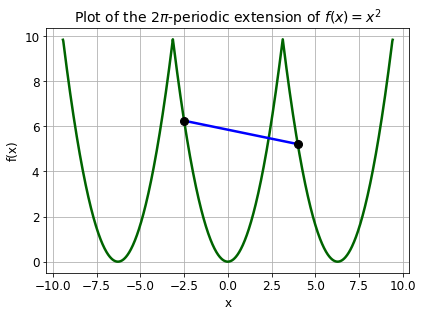

In [2]:
def f(x):
    return ((x + np.pi) % (2 * np.pi) - np.pi)**2

x = np.linspace(-9.43, 9.43, 1000)
y = f(x)

# Choose two points
x1, x2 = -2.5, 4
y1, y2 = f(x1), f(x2)

# Create line segment
line_x = np.linspace(x1, x2, 100)
line_y = np.linspace(y1, y2, 100)

# Plot function
plt.figure(figsize=(6.5, 4.5))
plt.plot(x, y, linewidth=2.5, color='darkgreen')

# Plot line segment
plt.plot(line_x, line_y, 'b-', linewidth=2.5)

# Add markers at y1 and y2
plt.plot(x1, y1, marker='o', markersize=8, color='black')
plt.plot(x2, y2, marker='o', markersize=8, color='black')

plt.title('Plot of the $2\pi$-periodic extension of $f(x) = x^2$', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.grid(True)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.savefig('Periodic_function_NC', facecolor='w', bbox_inches='tight')
plt.show()


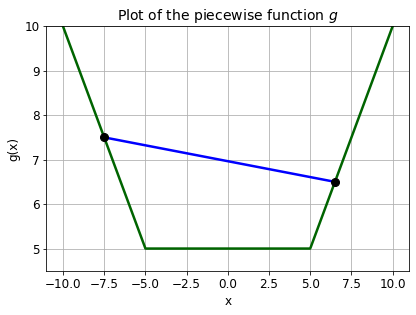

In [3]:
# Define the function
def g(x):
    if x < -5:
        return np.abs(x)
    elif x > 5:
        return np.abs(x)
    else:
        return 5

# Vectorize the function
g_vec = np.vectorize(g)

# Define the x values
x = np.linspace(-10, 10, 1000)

# Compute the y values
y = g_vec(x)

# Choose two points
x1, x2 = -7.5, 6.5
y1, y2 = g(x1), g(x2)

# Create line segment
line_x = np.linspace(x1, x2, 100)
line_y = np.linspace(y1, y2, 100)

# Plot the function
plt.figure(figsize=(6.5, 4.5))
plt.plot(x, y, linewidth=2.5, color='darkgreen')

# Plot line segment
plt.plot(line_x, line_y, 'b-', linewidth=2.5)

# Add markers at y1 and y2
plt.plot(x1, y1, marker='o', markersize=8, color='black')
plt.plot(x2, y2, marker='o', markersize=8, color='black')

plt.title(r'Plot of the piecewise function $g$', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('g(x)', fontsize=12)
plt.ylim([4.5, 10])  # Set y-axis limits
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.savefig('piecewise_function_C', facecolor='w', bbox_inches='tight')
plt.show()


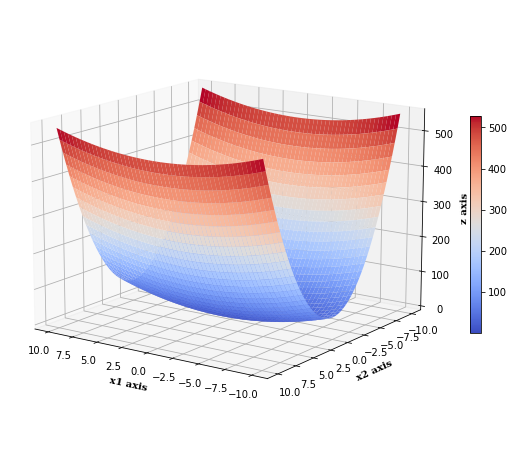

In [4]:
fig = plt.figure(figsize=(10, 8))  
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('x1 axis', fontsize=10, fontweight='bold', fontfamily='serif')
ax.set_ylabel('x2 axis', fontsize=10, fontweight='bold', fontfamily='serif')
ax.set_zlabel('z axis', fontsize=10, fontweight='bold', fontfamily='serif')
x1 = np.arange(-10, 10, 0.05)
x2 = np.arange(-10, 10, 0.05)
x1, x2 = np.meshgrid(x1, x2)
f = (x1**2 + 10*(x2**2)) / 2
surface = ax.plot_surface(x1, x2, f, cmap=cm.coolwarm, linewidth=0)
fig.colorbar(surface, shrink=0.5)
ax.view_init(elev=14, azim=125)
plt.show()

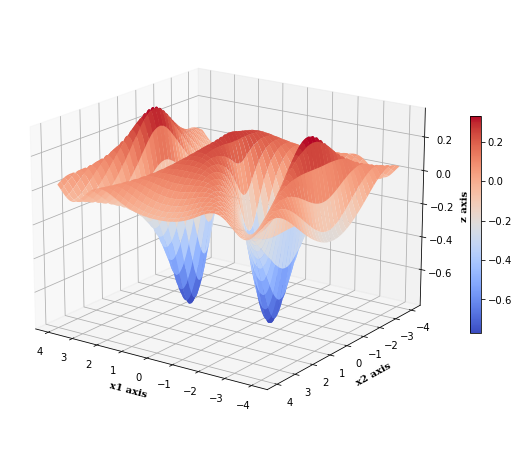

In [5]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('x1 axis', fontsize=10, fontweight='bold', fontfamily='serif')
ax.set_ylabel('x2 axis', fontsize=10, fontweight='bold', fontfamily='serif')
ax.set_zlabel('z axis', fontsize=10, fontweight='bold', fontfamily='serif')
x1 = np.arange(-4, 4, 0.05)
x2 = np.arange(-4, 4, 0.05)
x1, x2 = np.meshgrid(x1, x2)
f = np.sin(0.5*x1**2 - 0.25*x2**2 + 3) / (0.5 + 0.25*x1**2 + x2**2)
surface = ax.plot_surface(x1, x2, f, cmap=cm.coolwarm, linewidth=0)
fig.colorbar(surface, shrink=0.5)
ax.view_init(elev=18, azim=125)
plt.show() 

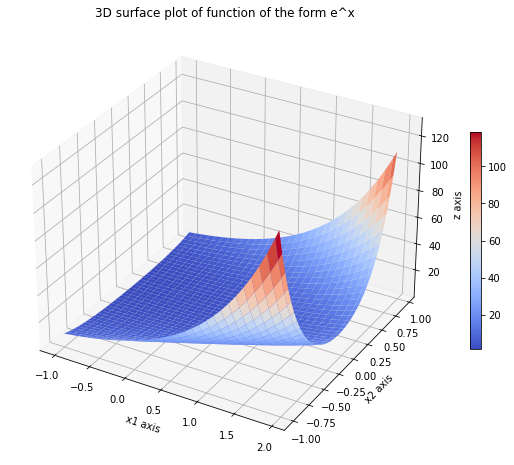

In [6]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
ax.set_title('3D surface plot of function of the form e^x')
ax.set_xlabel('x1 axis')
ax.set_ylabel('x2 axis')
ax.set_zlabel('z axis')
x1 = np.arange(-1, 2, 0.05)
x2 = np.arange(-1, 1, 0.05)
x1, x2 = np.meshgrid(x1, x2)
f = np.exp((x1 + 3*x2 - 0.1)) + np.exp((x1 - 3*x2 - 0.1)) + np.exp((-x2 - 0.1))
surface = ax.plot_surface(x1, x2, f, cmap=cm.coolwarm, linewidth=0)
fig.colorbar(surface, shrink=0.5)
plt.show()

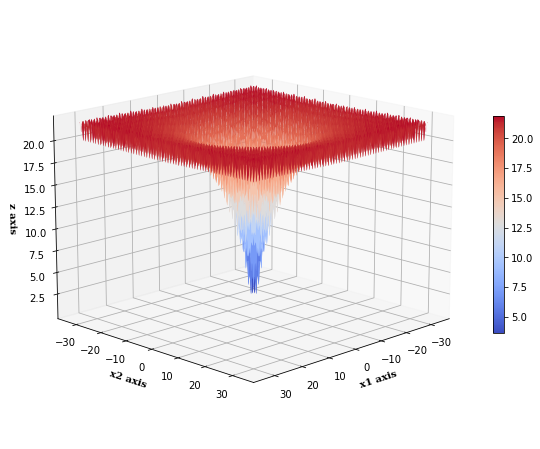

In [7]:
def objective(x1, x2):
    return -20.0 * np.exp(-0.2 * np.sqrt(0.5 * (x1**2 + x2**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x1) + np.cos(2 * np.pi * x2))) + np.e + 20

fig = plt.figure(figsize=(10, 8)) 
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('x1 axis', fontsize=10, fontweight='bold', fontfamily='serif')
ax.set_ylabel('x2 axis', fontsize=10, fontweight='bold', fontfamily='serif')
ax.set_zlabel('z axis', fontsize=10, fontweight='bold', fontfamily='serif')
ax.set_facecolor((1.0, 1.0, 1.0))
x1 = np.arange(-32.768, 32.768, 0.05)
x2 = np.arange(-32.768, 32.768, 0.05)
x1, x2 = np.meshgrid(x1, x2)
f = objective(x1, x2)
surface = ax.plot_surface(x1, x2, f, cmap='coolwarm', linewidth=0)
ax.view_init(elev=15, azim=45)
fig.colorbar(surface, shrink=0.5)
plt.show()

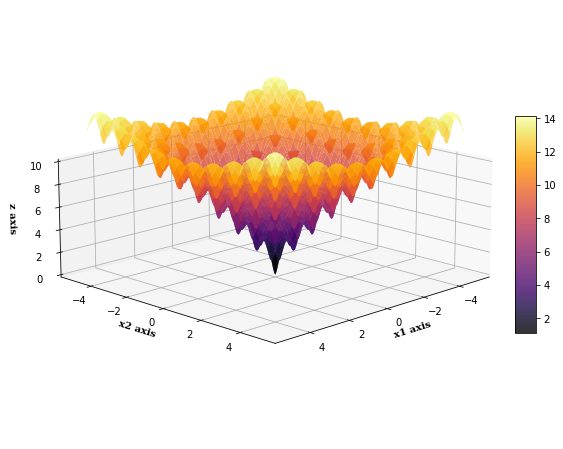

In [8]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('x1 axis', fontsize=10, fontweight='bold', fontfamily='serif')
ax.set_ylabel('x2 axis', fontsize=10, fontweight='bold', fontfamily='serif')
ax.set_zlabel('z axis', fontsize=10, fontweight='bold', fontfamily='serif')
x1 = np.arange(-5, 5, 0.025)
x2 = np.arange(-5, 5, 0.025)
x1, x2 = np.meshgrid(x1, x2)
f = objective(x1, x2)
surface = ax.plot_surface(x1, x2, f, cmap='inferno', edgecolor='none', alpha=0.8)
fig.colorbar(surface, shrink=0.5, aspect=10)
surface.set_facecolor((0,0,0,0))
ax.set_facecolor((1.0, 1.0, 1.0))
ax.set_box_aspect([1,1,0.4])
ax.auto_scale_xyz([-5,5],[-5,5],[0,10])
ax.dist = 12
ax.view_init(elev=15, azim=45)
plt.show() 